# Module Import Cell

In [30]:
%matplotlib inline
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
plt.style.use('ggplot') 

## Data Import Cell

In [31]:
#Available population density by state and year meassured in persons per square mile
pop_df = pd.read_csv('data/Historical_Population_Density_States_only_RAND_US_1.csv')
#---------------------------------------------------------------------------------------
#Available firearm background check data
nics_df = pd.read_csv('data/nics-firearm-background-checks.csv')

In [32]:
#Change month to y-m for year by month
nics_df = nics_df.rename(columns={'month': 'y&m'})
#Add year column to group by
nics_df['year'] = list(map(lambda x: x.split('-')[0], nics_df['y&m']))
#Defining columns to combine
handgun_list = ['handgun', 'prepawn_handgun', 'redemption_handgun', 'returned_handgun', 'rentals_handgun', 'private_sale_handgun', 'return_to_seller_handgun']
long_gun_list = ['long_gun', 'prepawn_long_gun', 'redemption_long_gun', 'returned_long_gun', 'rentals_long_gun', 'private_sale_long_gun', 'return_to_seller_long_gun']
#Create combined columns
nics_df['total_handgun'] = nics_df[handgun_list].sum(axis=1)
nics_df['total_long_gun'] = nics_df[long_gun_list].sum(axis=1)
#Group by year then state
year_state_group = nics_df.groupby(('year', 'state')).sum()
#Collect the columns we want and reset index
clean_nics_df = year_state_group[['total_handgun', 'total_long_gun']]
clean_nics_df = clean_nics_df.reset_index()
#Remove any year not between 1999 and 2018 and assign to my_nics_df
clean_nics_df['year'] = pd.to_numeric(clean_nics_df['year'])
my_nics_df = clean_nics_df.loc[(clean_nics_df['year'] < 2019) & (clean_nics_df['year'] > 1998)] 
#Test: Expect 1100 rows (50 states + DC, Guam, Puerto Rico, Mariana Islands, and Virgin Islands X 20 years) and 4 columns
my_nics_df.head()

,year,state,total_handgun,total_long_gun
55,1999,Alabama,94544.0,149017.0
56,1999,Alaska,14339.0,27790.0
57,1999,Arizona,78103.0,71365.0
58,1999,Arkansas,50523.0,126875.0
59,1999,California,371893.0,410119.0


In [33]:
#Droping NA Values
cleaner_pop_df = pop_df.dropna(axis=1)
#Keeping area and years from 1999 - 2018
cleaner_pop_df = cleaner_pop_df.loc[:, ['Area'] + list(map(str, range(1999, 2019)))]
#Rename 'Area' column to be more descriptive
my_pop_df = cleaner_pop_df.rename(columns={'Area': 'State'})
#test: expect 52 rows(50 states, DC, and US), 21 columns(State name + data from 1999 - 2018)
my_pop_df
#my_pop_df.shape

,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,86.11584,87.73153,87.97166,88.13692,88.49501,88.92066,89.56821,90.60555,91.39808,...,92.79339,94.30569,94.56949,94.89918,95.19273,95.42963,95.64008,95.86838,96.07284,96.32412
1,Alaska,1.08313,1.09712,1.10729,1.12368,1.13801,1.15669,1.17053,1.18424,1.19293,...,1.22121,1.24819,1.26241,1.27703,1.28865,1.28736,1.28953,1.29645,1.29344,1.28934
2,Arizona,42.04999,45.46765,46.67961,47.97931,49.20339,50.68374,52.57937,54.49134,55.98860,...,58.04376,56.38909,56.96746,57.69903,58.38869,59.25850,60.13637,61.12071,62.03085,63.11124
3,Arkansas,49.00063,51.43811,51.68355,51.94598,52.28321,52.74165,53.31897,54.06560,54.58602,...,55.49360,56.11850,56.47244,56.69718,56.84007,56.99712,57.20225,57.43278,57.67452,57.88248
4,California,212.52412,217.97073,221.11932,223.62363,226.02755,227.99801,229.51658,230.69608,232.27927,...,236.99551,239.29945,241.35717,243.40232,245.45441,247.66214,249.76527,251.40663,252.62632,253.63746
5,Colorado,39.10750,41.72940,42.74174,43.42819,43.85734,44.34815,44.93724,45.82681,46.68699,...,48.44647,48.67314,49.38170,50.07541,50.81550,51.59392,52.56664,53.42294,54.14588,54.91394
6,Connecticut,677.43374,704.20368,707.65212,711.76973,715.75153,717.18337,717.76255,719.36138,720.07782,...,726.19881,738.72549,740.56202,741.87719,741.98452,741.95728,740.45593,738.63240,737.64293,737.39216
7,Delaware,385.72555,402.55278,406.75485,411.62340,417.13845,423.14493,429.93612,436.65001,442.72815,...,453.08155,460.38639,464.33777,468.36643,472.69089,477.27533,481.78762,485.78096,489.80450,494.96981
8,District of Columbia,8452.76873,9311.79153,9414.36482,9439.49511,9410.04886,9442.93160,9479.62541,9511.04235,9550.63518,...,9766.40065,9919.42623,10157.40980,10405.32787,10662.80328,10860.86885,11069.73770,11255.32787,11404.77049,11515.65574
9,Florida,280.21760,297.57212,303.26040,309.31379,314.89309,322.20070,329.77780,335.42688,338.93873,...,343.76158,349.46845,354.05923,358.37762,362.77126,368.28175,375.03011,382.55386,388.98533,394.96588


In [34]:
new_my_pop_df = my_pop_df.loc[:, ['State', '2018']]
new_my_pop_df = new_my_pop_df[new_my_pop_df['State'] != 'United States']
my_2018_pop_df = new_my_pop_df

In [35]:
nics_2018_df = my_nics_df[my_nics_df['year'] == 2018]
rows_to_drop = ['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
for row in rows_to_drop:
    nics_2018_df = nics_2018_df[nics_2018_df['state'] != row]
nics_2018_df.shape

(51, 4)

In [37]:
temp = np.array(my_2018_pop_df['2018'])
nics_2018_df['pop_density'] = temp
nics_2018_df['handgun/long_gun'] = nics_2018_df['total_handgun'] / nics_2018_df['total_long_gun']
#nics_2018_df

pop_sorted_nics_2018_df = nics_2018_df.sort_values('pop_density')
#pop_sorted_nics_2018_df

In [38]:
nics_2018_df.head()

,year,state,total_handgun,total_long_gun,pop_density,handgun/long_gun
1100,2018,Alabama,99101.0,94386.0,96.32412,1.049954
1101,2018,Alaska,35344.0,34748.0,1.28934,1.017152
1102,2018,Arizona,165432.0,100359.0,63.11124,1.648402
1103,2018,Arkansas,80350.0,90980.0,57.88248,0.883161
1104,2018,California,439363.0,317334.0,253.63746,1.384544


In [44]:
#nics_2018_df['total_handgun'].median()
nics_2018_df.describe()

,year,total_handgun,total_long_gun,pop_density,handgun/long_gun
count,51.0,51.000000,51.000000,51.000000,51.000000
mean,2018.0,138054.078431,103376.607843,423.358617,1.654075
std,0.0,149504.351346,85730.347065,1605.799701,3.297579
min,2018.0,10.000000,31.000000,1.289340,0.070503
25%,2018.0,40816.000000,36366.000000,49.284280,0.902616
50%,2018.0,80350.000000,91200.000000,107.044150,1.195177
75%,2018.0,174336.500000,151466.000000,225.189510,1.494312
max,2018.0,643595.000000,452932.000000,11515.655740,24.400000


In [40]:
nics_2018_df[nics_2018_df['state'] == 'District of Columbia']

,year,state,total_handgun,total_long_gun,pop_density,handgun/long_gun
1108,2018,District of Columbia,976.0,40.0,11515.65574,24.4


In [56]:
nics_2018_df[nics_2018_df['state'] == 'Montana']

,year,state,total_handgun,total_long_gun,pop_density,handgun/long_gun
1128,2018,Montana,38393.0,58497.0,7.29846,0.656324


In [55]:
nics_2018_df['pop_density'].median()

107.04415

In [41]:
#pop_sorted_nics_2018_df
# fig, ax = plt.subplots(figsize=(25,15))
# labels = np.array(pop_sorted_nics_2018_df['state'])
# h_l_r = np.array(pop_sorted_nics_2018_df['handgun/long_gun'])
# x = np.arange(len(labels))
# ax.bar(x, h_l_r, label=('State ratios'))
# ax.margins(x=0)
# ax.set_ylabel('Ratio of handgun to rifle applications', fontdict={'fontsize': 25, 'fontweight': 5})
# ax.set_xlabel('States from least to most population density', fontdict={'fontsize': 25, 'fontweight': 5})
# #ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=270, fontsize=14, fontweight=4)
# ax.axhline(1, color='black', alpha=.5, label='1-1 ratio')
# ax.set_title('Ratio of handguns to rifles by population density', fontdict={'fontsize': 33, 'fontweight': 7})
# ax.legend()
# fig.tight_layout()
# #V Generates graph image if missing V
# #fig.savefig('graphs/bar.png')

In [42]:
C = pop_sorted_nics_2018_df[pop_sorted_nics_2018_df['state'] != 'District of Columbia']
# fig, ax = plt.subplots(figsize=(25,15))
# labels = np.array(noDC_pop_sorted_nics_2018_df['state'])
# h_l_r = np.array(noDC_pop_sorted_nics_2018_df['handgun/long_gun'])
# x = np.arange(len(labels))
# ax.bar(x, h_l_r, label=('State ratios'))
# ax.margins(x=0)
# ax.set_ylabel('Ratio of handgun to rifle applications', fontdict={'fontsize': 25, 'fontweight': 5})
# ax.set_xlabel('States from least to most population density', fontdict={'fontsize': 25, 'fontweight': 5})
# #ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=270, fontsize=14, fontweight=4)
# ax.axhline(1, color='black', alpha=.5, label='1-1 ratio')
# ax.set_title('Ratio of handguns to rifles by population density excluding DC', fontdict={'fontsize': 33, 'fontweight': 7})
# ax.legend()
# fig.tight_layout()
# #V Generates graph image if missing V
# #fig.savefig('graphs/bar.png')

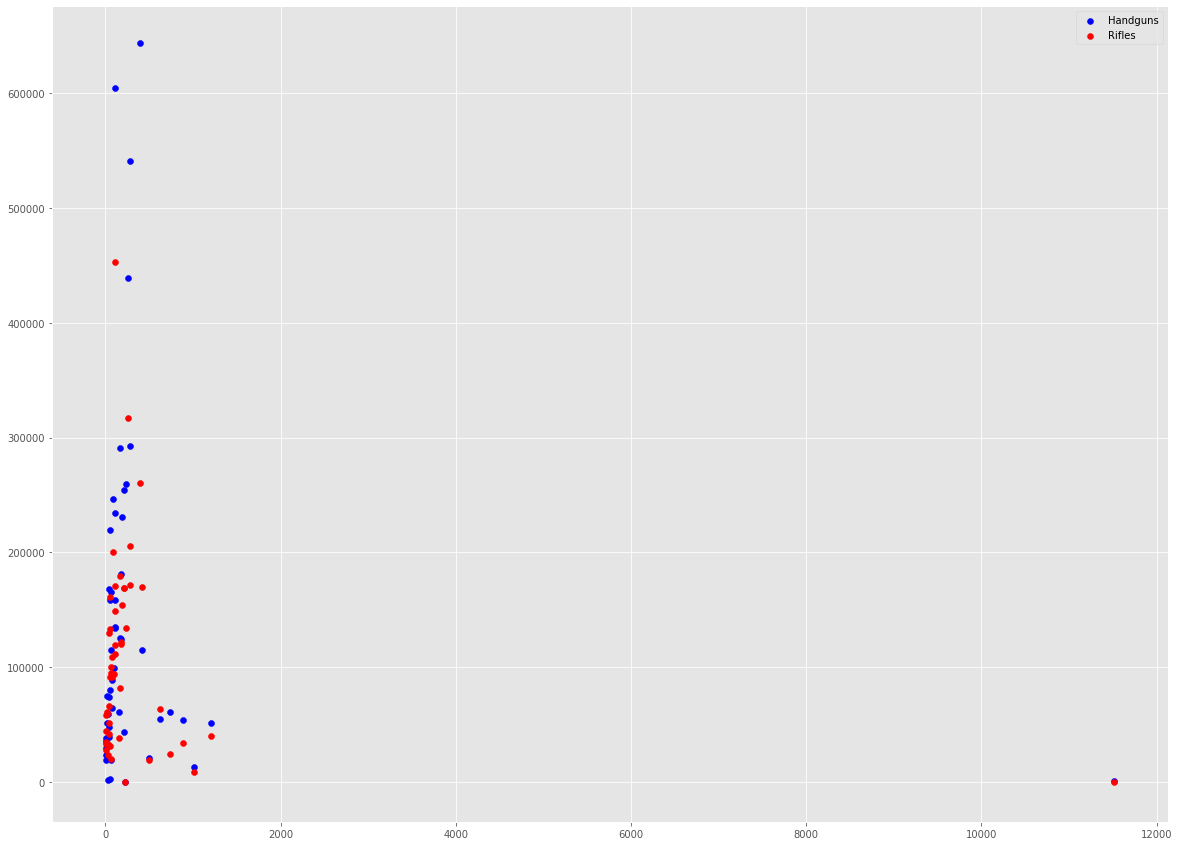

In [43]:
# nics_2018_df_noDC = nics_2018_df[nics_2018_df['state'] != 'District of Columbia']
# fig, ax = plt.subplots(figsize=(20,15))
# x = nics_2018_df_noDC['pop_density']
# handgun_y = nics_2018_df_noDC['total_handgun']
# long_gun_y = nics_2018_df_noDC['total_long_gun']
# ax.scatter(x, handgun_y, c='blue', label='Handguns')
# ax.scatter(x, long_gun_y, c='red', label='Rifles')
# ax.xlabel = 'Population Density'
# ax.ylabel = 'NICS Applications'
# for i in x:
#     ax.axvline(i, color='grey', alpha=.5)
# #ax.axvline(x, color='grey', alpha=.5)
# ax.legend()

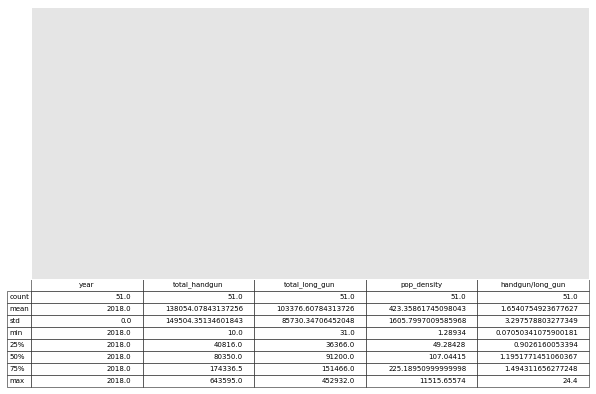

In [52]:
# #Thanks to Bunji from https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png for this code
# from pandas.plotting import table
# nics_describe = nics_2018_df.describe()
# fig, ax = plt.subplots(figsize=(10,5)) 
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False) 

# table(ax, nics_describe)  # where df is your data frame

In [53]:
nics_2018_describe = nics_2018_df.describe()
nics_2018_describe.to_csv('data/nics_2018_describe.csv')

In [54]:
nics_2018_df_noDC_describe = nics_2018_df_noDC.describe()
nics_2018_df_noDC_describe.to_csv('data/nics_2018_noDC_describe.csv')

\\aprox

Example:
    
    District of Columbia = 976 handgun applications and 40 rifle applications equate to a 24.4
    Montana = 38393 handgun applications and 58497 rifle applications for a proportion of .66